## Crop parameters wrt to the original untruncated but cropped tight bbx

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from collections import namedtuple
import math

In [2]:
BoundingBox = namedtuple('BoundingBox', 'cx cy w h')

In [3]:
def getRGBImage(image_):
    if image_.ndim == 3:
        if image_.shape[2] == 3:
            image = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
        elif image_.shape[2] == 4:
            image = cv2.cvtColor(image_, cv2.COLOR_BGRA2RGBA)
        else:
            image = image_
    else:
        image = image_
    return image

In [4]:
def plotOpenCVImage(image_):
    plt.imshow(getRGBImage(image_))

In [5]:
def getTightBBox(image):
    alpha = image[:,:,3].astype(bool)
    nonzero_idxs = np.nonzero(alpha)
    left = nonzero_idxs[1].min()
    right = nonzero_idxs[1].max() + 1
    top = nonzero_idxs[0].min()
    bottom = nonzero_idxs[0].max() + 1
    
    w = right - left
    h = bottom - top

    cx = (left + right) / 2.0
    cy = (bottom + top) / 2.0
    
    return BoundingBox(cx, cy, w, h)

In [6]:
def getRectanglePatch(bbx, linewidth=1, edgecolor='r'):
    x = math.floor(bbx.cx - bbx.w/2.0)
    y = math.floor(bbx.cy - bbx.h/2.0) 
    return plt.Rectangle((x, y), bbx.w, bbx.h, fill=False, linewidth = linewidth, edgecolor = edgecolor)

In [7]:
def cropImage(image, bbx):
    left = int(math.floor(bbx.cx - bbx.w/2.0))
    right = int(math.floor(bbx.cx + bbx.w/2.0))
    top = int(math.floor(bbx.cy - bbx.h/2.0))
    bottom = int(math.floor(bbx.cy + bbx.h/2.0))
    return image[top:bottom, left:right]

In [8]:
d_img = cv2.imread('../build/model_d2.png',cv2.IMREAD_UNCHANGED)
d_bbx = getTightBBox(d_img)
print d_bbx

BoundingBox(cx=486.5, cy=289.0, w=437, h=190)


In [9]:
d_crop_bbx = BoundingBox(d_bbx.cx + 25, d_bbx.cy + 20, d_bbx.w - 30, d_bbx.h + 15 )
print 'd_crop_bbx =', d_crop_bbx
d_crop_img = cropImage(d_img, d_crop_bbx)
print 'd_crop_img.shape =', d_crop_img.shape
cv2.imwrite('../build/d_crop_img.png', d_crop_img)

d_crop_bbx = BoundingBox(cx=511.5, cy=309.0, w=407, h=205)
d_crop_img.shape = (205, 407, 4)


True

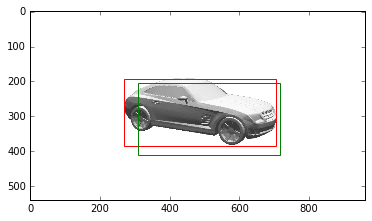

In [10]:
fig,ax = plt.subplots(1)
ax.imshow(getRGBImage(d_img))
ax.add_patch(getRectanglePatch(d_bbx, edgecolor='r'))
ax.add_patch(getRectanglePatch(d_crop_bbx, edgecolor='g'))
plt.show()

In [18]:
std_bbx = BoundingBox(960/2.0, 540/2.0, 960.0, 540.0)
norm_d_crop_bbx_std = BoundingBox(float(d_crop_bbx.cx) /std_bbx.w, 
                                   float(d_crop_bbx.cy)/std_bbx.h, 
                                   float(d_crop_bbx.w) / std_bbx.w, 
                                   float(d_crop_bbx.h) / std_bbx.h )
print 'norm_d_crop_bbx_std =', norm_d_crop_bbx_std

norm_d_crop_bbx_std = BoundingBox(cx=0.5328125, cy=0.5722222222222222, w=0.4239583333333333, h=0.37962962962962965)


In [12]:
d2_img = cv2.imread('../build/model_d2.png',cv2.IMREAD_UNCHANGED)
d2_bbx = getTightBBox(d2_img)
print d2_bbx

BoundingBox(cx=486.5, cy=289.0, w=437, h=190)


In [13]:
norm_d_crop_bbx = BoundingBox(float(d_crop_bbx.cx - d_bbx.cx)/d_bbx.w, 
                               float(d_crop_bbx.cy - d_bbx.cy)/d_bbx.h, 
                               float(d_crop_bbx.w) / d_bbx.w, 
                               float(d_crop_bbx.h) / d_bbx.h )

print 'norm_d_crop_bbx = ', norm_d_crop_bbx

d2_crop_bbx = BoundingBox(d2_bbx.cx + norm_d_crop_bbx.cx * d2_bbx.w, 
                          d2_bbx.cy + norm_d_crop_bbx.cy * d2_bbx.h, 
                          norm_d_crop_bbx.w * d2_bbx.w,
                          norm_d_crop_bbx.h * d2_bbx.h)

print 'd2_crop_bbx = ', d2_crop_bbx

norm_d_crop_bbx =  BoundingBox(cx=0.057208237986270026, cy=0.10526315789473684, w=0.931350114416476, h=1.0789473684210527)
d2_crop_bbx =  BoundingBox(cx=511.5, cy=309.0, w=407.0, h=205.0)


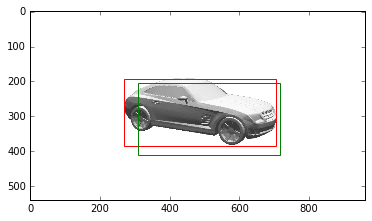

In [14]:
fig,ax = plt.subplots(1)
ax.imshow(getRGBImage(d2_img))
ax.add_patch(getRectanglePatch(d2_bbx, edgecolor='r'))
ax.add_patch(getRectanglePatch(d2_crop_bbx, edgecolor='g'))
plt.show()

In [15]:
fig,ax = plt.subplots(1)
ax.imshow(getRGBImage(d_crop_img))

In [16]:
d2_crop_img = cropImage(d2_img, d2_crop_bbx)
fig,ax = plt.subplots(1)
ax.imshow(getRGBImage(d2_crop_img))

Num of diffferent pixels = 0
0
0


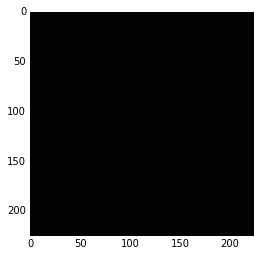

In [17]:
d_crop_img_mask = cv2.resize(d_crop_img, (224, 224))[:,:,3].astype(bool)
d2_crop_img_mask = cv2.resize(d2_crop_img, (224, 224))[:,:,3].astype(bool)
diff = np.absolute((d_crop_img_mask.astype(int) - d2_crop_img_mask.astype(int)))

print 'Num of diffferent pixels = {}'.format(diff.sum())

diff *= 255
print diff.min()
print diff.max()

plt.imshow(diff.astype(np.uint8), cmap = 'gray', interpolation = 'bicubic')